In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.impute import KNNImputer


In [3]:
df = pd.read_csv(r"C:\Users\1712a\Downloads\GiveMeSomeCredit\cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
def null_counts(df):
    return df.isnull().sum()
null_counts(df)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

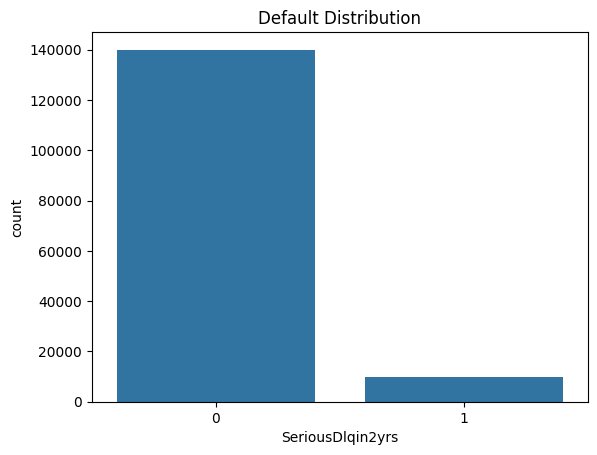

In [7]:
def target_distribution_plot(df):
    sns.countplot(x="SeriousDlqin2yrs", data=df)
    plt.title("Default Distribution")
    plt.show()
target_distribution_plot(df)

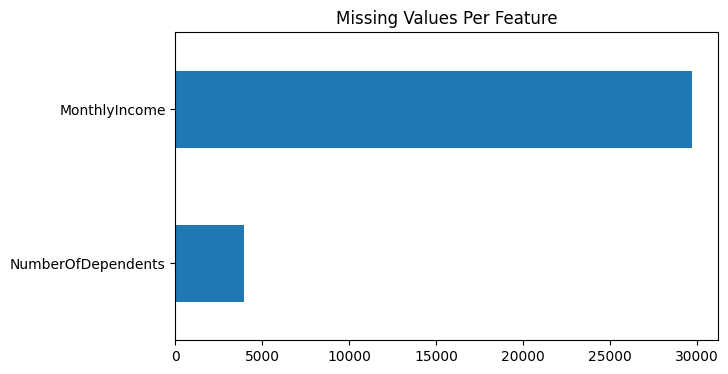

In [8]:
def missing_values_plot(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    missing.sort_values().plot(kind="barh", figsize=(7,4))
    plt.title("Missing Values Per Feature")
    plt.show()
missing_values_plot(df)

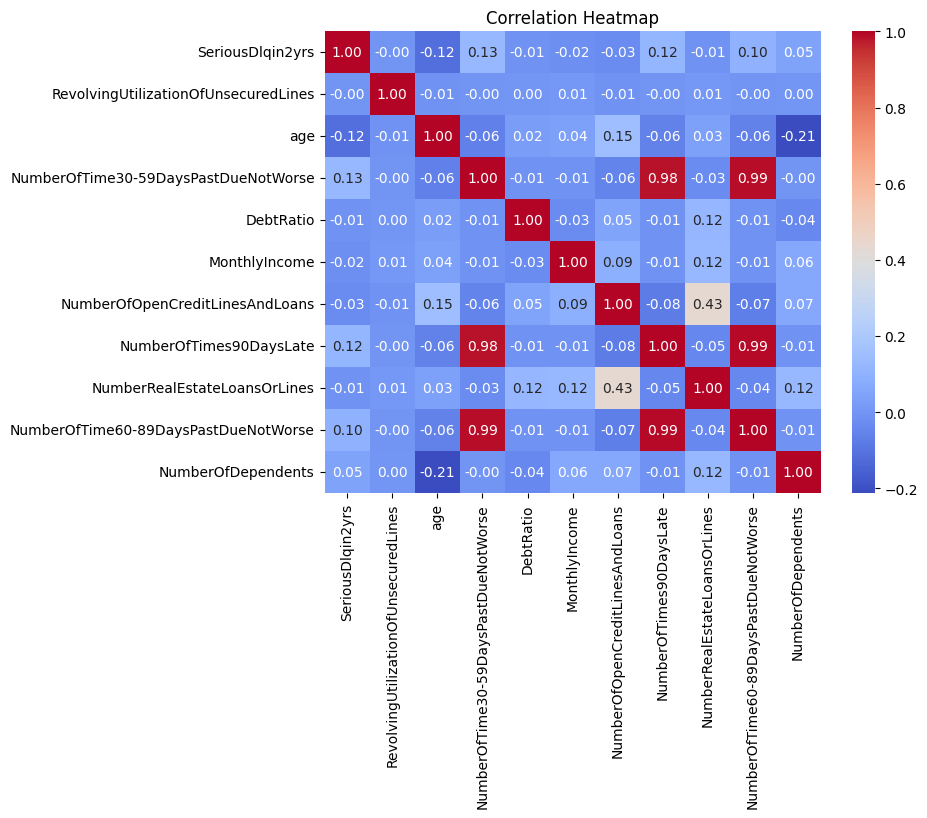

In [9]:
def cor(df):
    cor = df.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

cor(df)

In [10]:
income_imputer = KNNImputer(n_neighbors=5)

df["MonthlyIncome"] = income_imputer.fit_transform(
    df[["MonthlyIncome"]]
)


In [11]:
df["NumberOfDependents"].fillna(
    df["NumberOfDependents"].mode()[0],
    inplace=True
)


C:\Users\1712a\AppData\Local\Temp\ipykernel_20296\3432714289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NumberOfDependents"].fillna(


In [12]:
null_counts(df)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

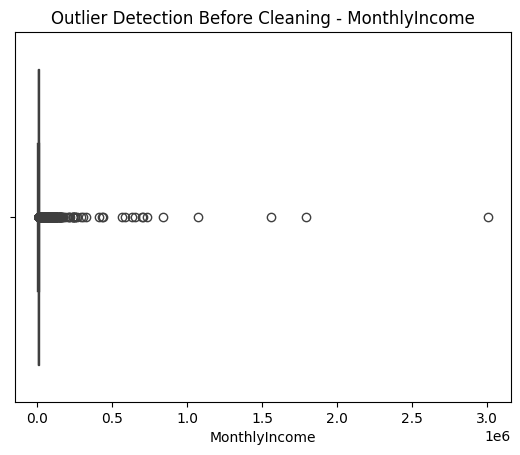

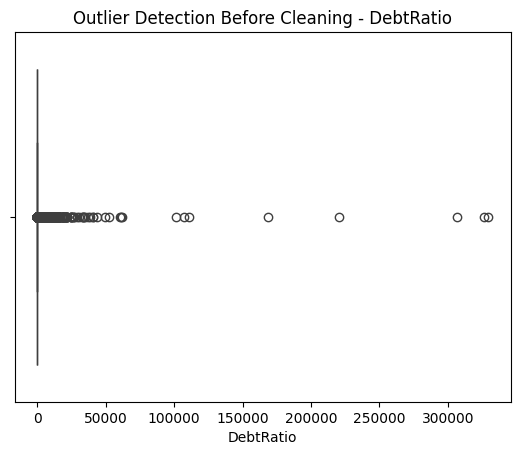

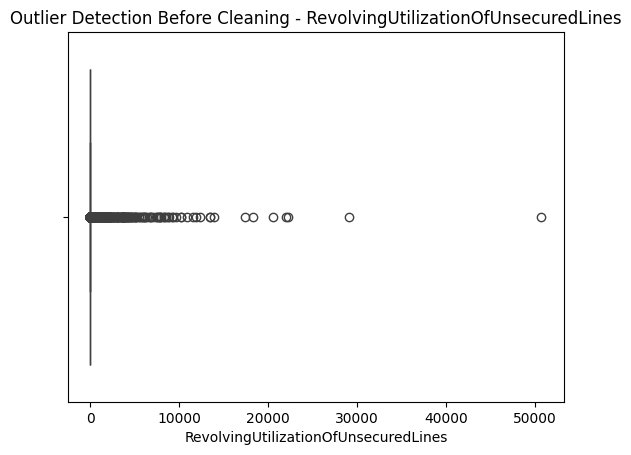

In [13]:
outlier_cols = [
    "MonthlyIncome",
    "DebtRatio",
    "RevolvingUtilizationOfUnsecuredLines"
]

for col in outlier_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection Before Cleaning - {col}")
    plt.show()


In [14]:
def iqr_cap(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return column.clip(lower, upper)


In [15]:
for col in outlier_cols:
    df[col] = iqr_cap(df[col])

In [16]:
df["MonthlyIncome"] = winsorize(df["MonthlyIncome"], limits=[0.01, 0.01])


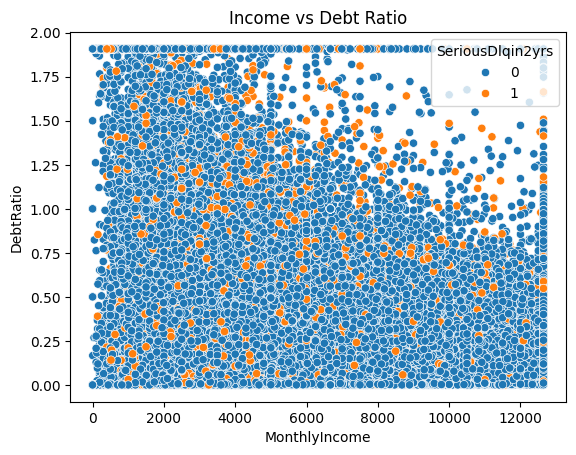

In [17]:
sns.scatterplot(
    x="MonthlyIncome",
    y="DebtRatio",
    hue="SeriousDlqin2yrs",
    data=df
)
plt.title("Income vs Debt Ratio")
plt.show()


In [18]:
df["DebtToIncome"] = df["DebtRatio"] / (df["MonthlyIncome"] + 1)


In [19]:
df["UtilizationBand"] = pd.cut(
    df["RevolvingUtilizationOfUnsecuredLines"],
    bins=[0,0.3,0.7,1,10],
    labels=["Low","Medium","High","Very High"]
)


In [20]:
df["DependentsRisk"] = pd.cut(
    df["NumberOfDependents"],
    bins=[-1,1,3,10],
    labels=["Low","Medium","High"]
)


In [21]:
df["AgeGroup"] = pd.cut(
    df["age"],
    bins=[18,30,45,60,100],
    labels=["18-30","31-45","46-60","60+"]
)


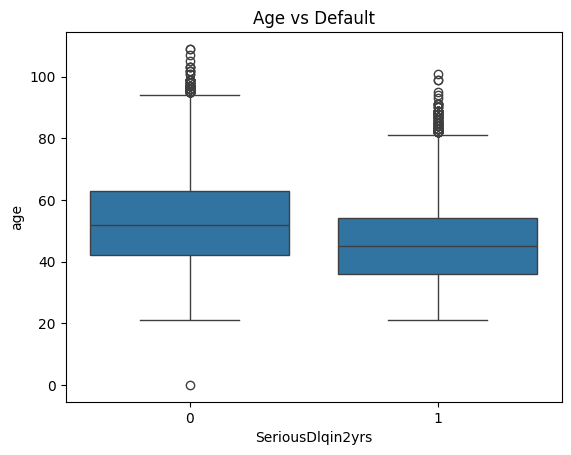

In [22]:
sns.boxplot(x="SeriousDlqin2yrs", y="age", data=df)
plt.title("Age vs Default")
plt.show()


C:\Users\1712a\AppData\Local\Temp\ipykernel_20296\2394414333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bias = df.groupby("AgeGroup")["SeriousDlqin2yrs"].mean()


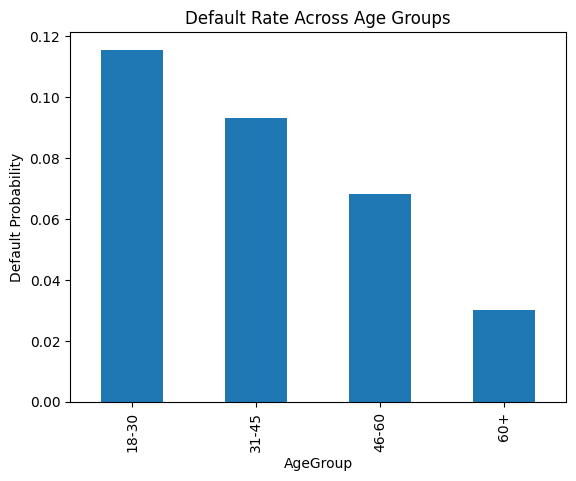

In [23]:
age_bias = df.groupby("AgeGroup")["SeriousDlqin2yrs"].mean()

age_bias.plot(kind="bar")
plt.title("Default Rate Across Age Groups")
plt.ylabel("Default Probability")
plt.show()


In [24]:
df["MonthlyIncome"] = np.log1p(df["MonthlyIncome"])


In [25]:
df = pd.get_dummies(
    df,
    columns=["AgeGroup","UtilizationBand","DependentsRisk"],
    drop_first=True
)


In [26]:
df.isnull().sum()


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
DebtToIncome                            0
AgeGroup_31-45                          0
AgeGroup_46-60                          0
AgeGroup_60+                            0
UtilizationBand_Medium                  0
UtilizationBand_High                    0
UtilizationBand_Very High               0
DependentsRisk_Medium                   0
DependentsRisk_High                     0
dtype: int64

In [27]:
df.shape

(150000, 20)

In [28]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtToIncome,AgeGroup_31-45,AgeGroup_46-60,AgeGroup_60+,UtilizationBand_Medium,UtilizationBand_High,UtilizationBand_Very High,DependentsRisk_Medium,DependentsRisk_High
0,1,0.766127,45,2,0.802982,9.118335,13,0,6,0,2.0,0.000088,True,False,False,False,True,False,True,False
1,0,0.957151,40,0,0.121876,7.863651,4,0,0,0,1.0,0.000047,True,False,False,False,True,False,False,False
2,0,0.658180,38,1,0.085113,8.020599,2,1,0,0,0.0,0.000028,True,False,False,True,False,False,False,False
3,0,0.233810,30,0,0.036050,8.101981,5,0,0,0,0.0,0.000011,False,False,False,False,False,False,False,False
4,0,0.907239,49,1,0.024926,9.445136,7,0,1,0,0.0,0.000002,False,True,False,False,True,False,False,False
5,0,0.213179,74,0,0.375607,8.160804,3,0,1,0,1.0,0.000107,False,False,True,False,False,False,False,False
6,0,0.305682,57,0,1.908024,8.805558,8,0,3,0,0.0,0.000286,False,True,False,True,False,False,False,False
7,0,0.754464,39,0,0.209940,8.160804,8,0,0,0,0.0,0.000060,True,False,False,False,True,False,False,False
8,0,0.116951,27,0,1.908024,8.805558,2,0,0,0,0.0,0.000286,False,False,False,False,False,False,False,False
9,0,0.189169,57,0,0.606291,9.445136,9,0,4,0,2.0,0.000048,False,True,False,False,False,False,True,False


In [29]:
df.to_csv(r"C:\Users\1712a\Never delete\evo_astra\project_1\updated_data.csv", index=False)
